# Tutorial
* http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
* https://machine-learning-python.kspax.io/Classification/ex1_Recognizing_hand-written_digits.html

In [37]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

* scikit-learn dataset documents: http://scikit-learn.org/stable/datasets/
* scikit-learn dataset API: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

In [38]:
for key,value in digits.items() :
    try:
        print (key,value.shape)
    except:
        print (key)

('images', (1797, 8, 8))
('data', (1797, 64))
('target_names', (10,))
DESCR
('target', (1797,))


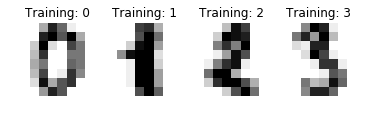

In [39]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
plt.show()

* zip: https://docs.python.org/2/library/functions.html#zip
* enumerate: https://docs.python.org/2/library/functions.html#enumerate

In [40]:
n_samples = len(digits.images)

# 資料攤平:1797 x 8 x 8 -> 1797 x 64
# 這裏的-1代表自動計算，相當於 (n_samples, 64)
# data = digits.data
data = digits.images.reshape((n_samples, -1))


# 產生SVC分類器
classifier = svm.SVC()

# 用前半部份的資料來訓練
classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

expected = digits.target[n_samples / 2:]

#利用後半部份的資料來測試分類器，共 899筆資料
predicted = classifier.predict(data[n_samples / 2:])

print(expected[:10])
print(predicted[:10])

[8 8 4 9 0 8 9 8 1 2]
[8 5 5 9 5 5 5 5 1 2]


In [41]:
print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[38  0  0  0  0 50  0  0  0  0]
 [ 0 50  0  0  0 41  0  0  0  0]
 [ 0  0 29  0  0 57  0  0  0  0]
 [ 0  0  0 54  0 37  0  0  0  0]
 [ 0  0  0  0 27 65  0  0  0  0]
 [ 0  0  0  0  0 91  0  0  0  0]
 [ 0  0  0  0  0 58 33  0  0  0]
 [ 0  0  0  0  0 64  0 25  0  0]
 [ 0  0  0  0  0 87  0  0  1  0]
 [ 0  0  0  0  0 84  0  0  0  8]]


In [42]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    import numpy as np
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(digits.target_names))
    plt.xticks(tick_marks, digits.target_names, rotation=45)
    plt.yticks(tick_marks, digits.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))

In [43]:
print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.43      0.60        88
          1       1.00      0.55      0.71        91
          2       1.00      0.34      0.50        86
          3       1.00      0.59      0.74        91
          4       1.00      0.29      0.45        92
          5       0.14      1.00      0.25        91
          6       1.00      0.36      0.53        91
          7       1.00      0.28      0.44        89
          8       1.00      0.01      0.02        88
          9       1.00      0.09      0.16        92

avg / total       0.91      0.40      0.44       899




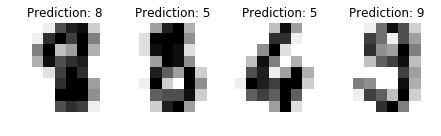

In [44]:
images_and_predictions = list(
                        zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

延伸問題：
1. SVM的參數如何調控
2. 如何使用Cross Validation
3. 導入external dataset(ex: http://yann.lecun.com/exdb/mnist/)
4. Kaggle competition: https://www.kaggle.com/c/digit-recognizer